## Activity 1: Loading and exploring the digits dataset

In [6]:
from sklearn import datasets
from IPython.display import display, Markdown

### digits.images and digits.targets

In [7]:
digits = datasets.load_digits()
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [3]:
scaled_images = ((1-digits.images/16)*255).astype('uint8') # Scaling pixels between 0 (black) and 255 (white)

In [4]:
scaled_images[0]

array([[255, 255, 175,  47, 111, 239, 255, 255],
       [255, 255,  47,  15,  95,  15, 175, 255],
       [255, 207,  15, 223, 255,  79, 127, 255],
       [255, 191,  63, 255, 255, 127, 127, 255],
       [255, 175, 127, 255, 255, 111, 127, 255],
       [255, 191,  79, 255, 239,  63, 143, 255],
       [255, 223,  31, 175,  95,  63, 255, 255],
       [255, 255, 159,  47,  95, 255, 255, 255]], dtype=uint8)

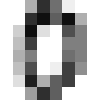

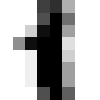

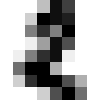

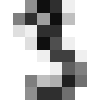

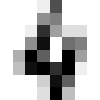

In [5]:
from PIL import Image
for i in range(5):
    display(Image.fromarray(scaled_images[i]).resize((100,100)))

In [6]:
digits.target[:5]

array([0, 1, 2, 3, 4])

In [7]:
from collections import Counter
Counter(digits.target) #Number of each class in the dataset

Counter({0: 178,
         1: 182,
         2: 177,
         3: 183,
         4: 181,
         5: 182,
         6: 181,
         7: 179,
         8: 174,
         9: 180})

### digits.data

In [8]:
digits.data.shape

(1797, 64)

## Activity 2, Variance Thresholding

In [9]:
digits.images.var(axis=0).round(1)

array([[ 0. ,  0.8, 22.6, 18. , 18.4, 32.1, 11.1,  1.1],
       [ 0. , 10.2, 29.4, 15.8, 22.9, 36.6, 12.9,  0.7],
       [ 0. , 12.8, 32.4, 33.7, 38.1, 38.4, 10.6,  0.2],
       [ 0. ,  9.9, 38.3, 34.6, 37.8, 34.5, 13.6,  0. ],
       [ 0. , 12.1, 40. , 39.3, 35.2, 34.4, 12.5,  0. ],
       [ 0. ,  8.9, 42.7, 41.5, 39.2, 32.4, 18.7,  0.1],
       [ 0. ,  3. , 31.8, 27.3, 28.1, 36.4, 24.2,  1. ],
       [ 0. ,  0.9, 26. , 19.1, 24.3, 34.8, 16.7,  3.5]])

In [10]:
digits.data.var(axis=0).round(1) # The same values as above but flattened from an 8x8 image to a 64 dimensional vector

array([ 0. ,  0.8, 22.6, 18. , 18.4, 32.1, 11.1,  1.1,  0. , 10.2, 29.4,
       15.8, 22.9, 36.6, 12.9,  0.7,  0. , 12.8, 32.4, 33.7, 38.1, 38.4,
       10.6,  0.2,  0. ,  9.9, 38.3, 34.6, 37.8, 34.5, 13.6,  0. ,  0. ,
       12.1, 40. , 39.3, 35.2, 34.4, 12.5,  0. ,  0. ,  8.9, 42.7, 41.5,
       39.2, 32.4, 18.7,  0.1,  0. ,  3. , 31.8, 27.3, 28.1, 36.4, 24.2,
        1. ,  0. ,  0.9, 26. , 19.1, 24.3, 34.8, 16.7,  3.5])

In [11]:
digits.images.var(axis=0).round(1) < 1 # Pixels with variance < 1

array([[ True,  True, False, False, False, False, False, False],
       [ True, False, False, False, False, False, False,  True],
       [ True, False, False, False, False, False, False,  True],
       [ True, False, False, False, False, False, False,  True],
       [ True, False, False, False, False, False, False,  True],
       [ True, False, False, False, False, False, False,  True],
       [ True, False, False, False, False, False, False, False],
       [ True,  True, False, False, False, False, False, False]])

In [12]:
from sklearn.feature_selection import VarianceThreshold
variance_threshold = VarianceThreshold(threshold = 1.)
variance_threshold

VarianceThreshold(threshold=1.0)

In [13]:
new_data = variance_threshold.fit_transform(digits.data)
print(f'Previous shape:{digits.data.shape}, new shape: {new_data.shape}')

Previous shape:(1797, 64), new shape: (1797, 48)


## Activity 3, Finding Covariance in the Digits Dataset

In [25]:
import numpy as np
cor = np.corrcoef(digits.data, rowvar=False) 

/Users/xavierholt/.conda/lib/python3.6/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/xavierholt/.conda/lib/python3.6/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [26]:
print(cor[:3, :3]) # we see wherever there is a pixel with dimensionality zero
print(cor.shape)

[[       nan        nan        nan]
 [       nan 1.         0.55661811]
 [       nan 0.55661811 1.        ]]
(64, 64)


In [27]:
cor_abs = np.abs(cor)
n = cor.shape[0]
for i in range(n):
    for j in range(n):
        if i == j:
            continue
        if cor_abs[i, j] > 0.9:
            print(f'Pixel {i} and {j} have correlation: {cor[i,j]:.2f}')

Pixel 2 and 58 have correlation: 0.94
Pixel 58 and 2 have correlation: 0.94


### Activity 4, An Introduction to Word Embeddings

In [28]:
import spacy #pip install spacy


In [29]:
nlp = spacy.load('en_core_web_md') #python -m spacy download en_core_web_md

In [30]:
tokens = nlp(u'dog cat banana')
for token1 in tokens:
    for token2 in tokens:
        print(token1.text, token2.text, token1.similarity(token2))

dog dog 0.99999994
dog cat 0.80168545
dog banana 0.24327643
cat dog 0.80168545
cat cat 1.0000001
cat banana 0.28154364
banana dog 0.24327643
banana cat 0.28154364
banana banana 1.0000001


### Activity 5, Random Projections

In [31]:
from random import seed
seed(100)
import numpy as np
X = np.random.rand(100, 10000) # Generate a large random matrix.
print(X.shape)

(100, 10000)


In [32]:
from sklearn.random_projection import SparseRandomProjection
sparse_random_projection = SparseRandomProjection()
X_reduced = sparse_random_projection.fit_transform(X)
X_reduced.shape

(100, 3947)

In [33]:
sparse_random_projection.components_

<3947x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 394590 stored elements in Compressed Sparse Row format>

### Activity 6, PCA and sklearn


In [4]:
from sklearn import decomposition

In [8]:
pca = decomposition.PCA(n_components = 2)
pca.fit(digits.data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [9]:
pca.components_.shape

(2, 64)

#### The principal components

In [10]:
c1, c2 = pca.components_.reshape(-1, 8, 8)

In [11]:
c1.round(1) #the weight of each pixel to the first principal component

array([[-0. , -0. , -0.2, -0.1, -0. , -0.1, -0. ,  0. ],
       [-0. , -0.1, -0.2,  0.1, -0. , -0.2, -0. ,  0. ],
       [-0. , -0.1,  0.1,  0.2, -0.2, -0.2,  0. ,  0. ],
       [ 0. ,  0.1,  0.3, -0. , -0.2, -0. ,  0.1,  0. ],
       [ 0. ,  0.2,  0.4,  0.2,  0.1,  0. ,  0. ,  0. ],
       [ 0. ,  0.1,  0.3,  0.2,  0.2,  0. , -0. ,  0. ],
       [ 0. , -0. , -0.1,  0.1,  0.1, -0.1, -0.1,  0. ],
       [ 0. , -0. , -0.2, -0.1, -0. , -0.1, -0. , -0. ]])

In [12]:
c2.round(1) #the weight of each pixel to the second principal component

array([[-0. , -0. , -0. , -0. , -0.1, -0.1, -0.1, -0. ],
       [-0. , -0. ,  0.1, -0. , -0.1, -0.1, -0.1, -0. ],
       [-0. ,  0. ,  0.2, -0. , -0.2, -0. ,  0. , -0. ],
       [-0. ,  0.1,  0.2, -0.1, -0.3,  0. ,  0.1,  0. ],
       [-0. ,  0.1,  0.1, -0.3, -0.3,  0.2,  0.1, -0. ],
       [ 0. ,  0.1,  0.1, -0.3, -0.3,  0.2,  0.2,  0. ],
       [ 0. ,  0. ,  0.2, -0.1, -0.1,  0.3,  0.1,  0. ],
       [-0. , -0. , -0.1,  0. ,  0.2,  0.2,  0. , -0. ]])

#### Explained Variance

In [13]:
pca.explained_variance_ratio_ # the first PC explains 14.9% of the variance, the next 13.6%
pca.explained_variance_ratio_.sum() # this means 28.5% of total variance is explained by the first two principal components

0.285093648236992

In [16]:
all_variance = decomposition.PCA().fit(digits.data).explained_variance_ratio_

[0.15 0.29 0.4  0.49 0.54 0.59 0.64 0.67 0.71 0.74 0.76 0.78 0.8  0.82
 0.84 0.85 0.86 0.88 0.89 0.89 0.9  0.91 0.92 0.93 0.93 0.94 0.94 0.95
 0.95 0.96 0.96 0.97 0.97 0.97 0.98 0.98 0.98 0.98 0.99 0.99 0.99 0.99
 0.99 0.99 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.  ]


#### Cumulative variance explained by principal component on the digits dataset

<BarContainer object of 64 artists>

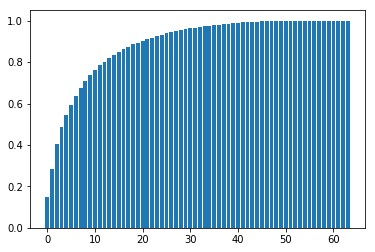

In [17]:
from matplotlib import pyplot
print(all_variance.cumsum().round(2))
display(Markdown("#### Cumulative variance explained by principal component on the digits dataset"))
display(pyplot.bar(x = range(len(all_variance)), height=all_variance.cumsum()))

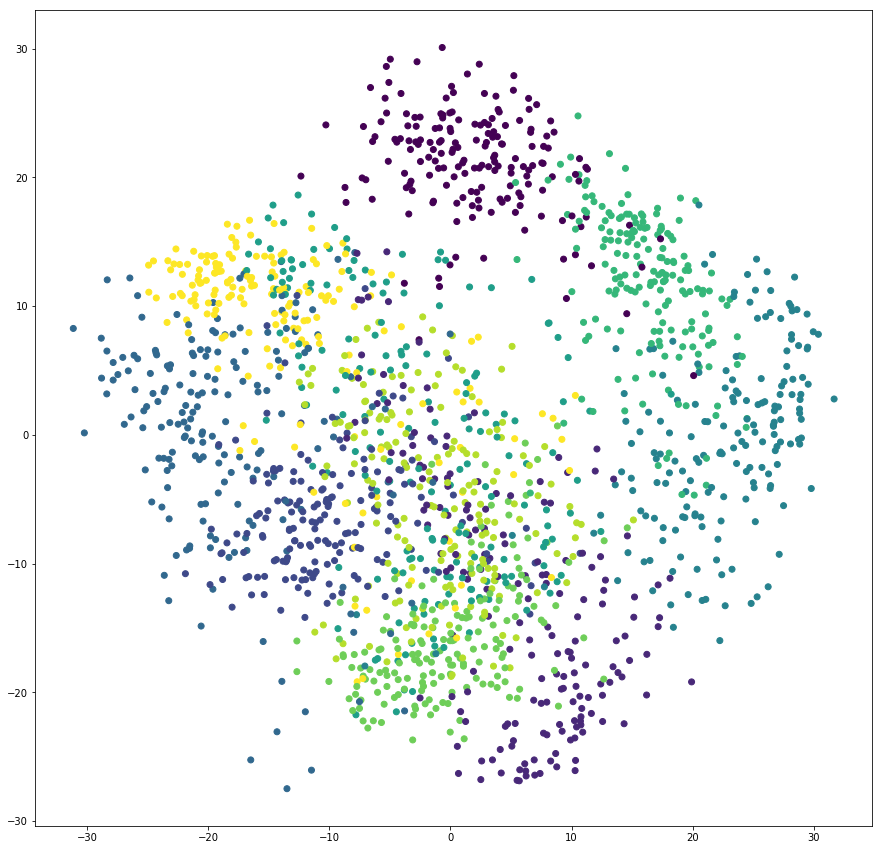

In [19]:
from matplotlib import pyplot
princomps  = pca.transform(digits.data)
fig, ax = pyplot.subplots(figsize = (15,15))
ax.scatter(princomps[:,0], princomps[:,1], c=digits.target)